In [1]:
import pandas as pd
import numpy as np
import modeltest as deep
import experiment as exp
import myutil as util
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
import importlib
importlib.reload(deep)
importlib.reload(exp)

<module 'experiment' from 'c:\\Users\\kyeongtaek\\generative_model\\land_sat\\experiment.py'>

In [2]:
#파일 읽기
filepath_german_csv = 'sat.csv'
d_german_df = pd.read_csv(filepath_german_csv)

#numpy 변환
d_german_np = np.array(d_german_df)

# sample 수, 특징 수 등 계산
n_row = d_german_np.shape[0]
n_features = d_german_np.shape[1]-1

# 입력과 출력 데이터 분리
x = d_german_np[:, :n_features]
y = d_german_np[:, n_features]-1

#정규화
x_norm = (x - np.min(x,0))/ (np.max(x,0) - np.min(x,0))
y_norm = (y - np.min(y,0))/ (np.max(y,0) - np.min(y,0))

In [3]:
import tensorflow_addons as tfa

c:\Users\kyeongtaek\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Triplet Loss

Epoch 1/500
161/161 [==============================] - 2s 10ms/step - loss: 0.0849 - val_loss: 0.4606
Epoch 2/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0626 - val_loss: 0.2163
Epoch 3/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0550 - val_loss: 0.0963
Epoch 4/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0496 - val_loss: 0.0522
Epoch 5/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0463 - val_loss: 0.0429
Epoch 6/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0462 - val_loss: 0.0490
Epoch 7/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0450 - val_loss: 0.0461
Epoch 8/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0431 - val_loss: 0.0435
Epoch 9/500
161/161 [==============================] - 1s 9ms/step - loss: 0.0412 - val_loss: 0.0401
Epoch 10/500
161/161 [==============================] - 1s 8ms/step - loss: 0.0383 - val_l

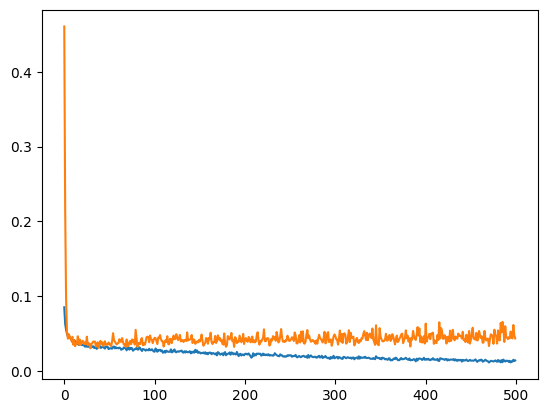

In [48]:
# 10fold validation 수행여부
bTenFoldValidation = False
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 32, validation_data=(x_val, y_val))
    # 결과 출력

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    N = 10
    total = 0
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x_norm, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        g = deep.encoder(x.shape[1:])
        
        g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

        # 학습
        hist = g.fit(x_train, y_train, epochs=2000, batch_size = 256, validation_data=(x_test, y_test))
        
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['accuracy'])
    #plt.plot(result.val_acc)
        plt.show()


Triplet 전이학습

Epoch 1/500
181/181 [==============================] - 2s 7ms/step - loss: 0.1409
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1266
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1212
Epoch 4/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1139
Epoch 5/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1112
Epoch 6/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1094
Epoch 7/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1072
Epoch 8/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1051
Epoch 9/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1078
Epoch 10/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1035
Epoch 11/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1025
Epoch 12/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1052
Epoch 13/500


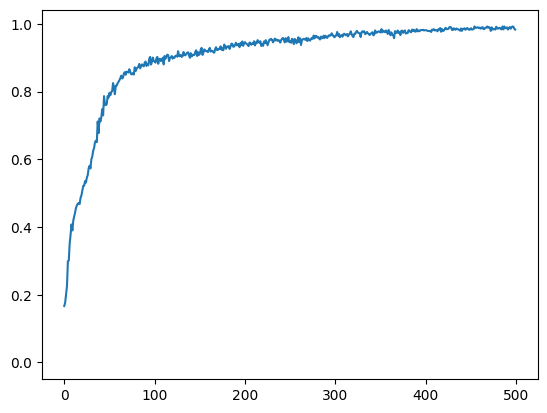

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1429
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1276
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1170
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1136
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1148
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1099
Epoch 7/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1034
Epoch 8/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1051
Epoch 9/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1028
Epoch 10/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1054
Epoch 11/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1028
Epoch 12/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1042
Epoch 13/500


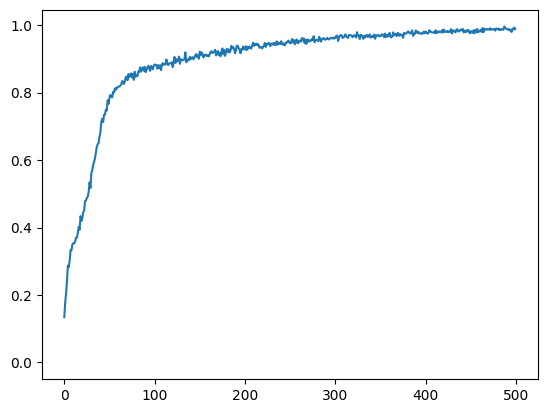

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1463
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1230
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1127
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1075
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1051
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1017
Epoch 7/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1006
Epoch 8/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1025
Epoch 9/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1001
Epoch 10/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0967
Epoch 11/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0938
Epoch 12/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0976
Epoch 13/500


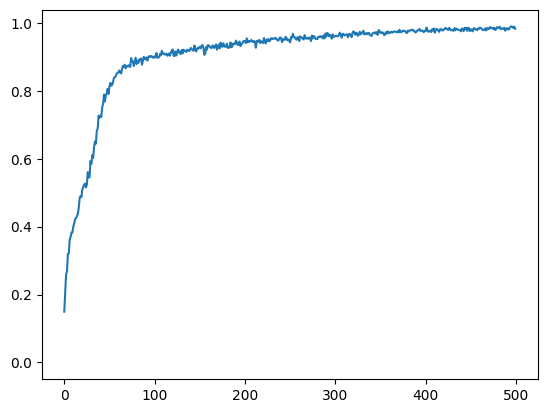

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1381
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1180
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1118
Epoch 4/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1055
Epoch 5/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1017
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1000
Epoch 7/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0992
Epoch 8/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0937
Epoch 9/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0962
Epoch 10/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0963
Epoch 11/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0971
Epoch 12/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0938
Epoch 13/500


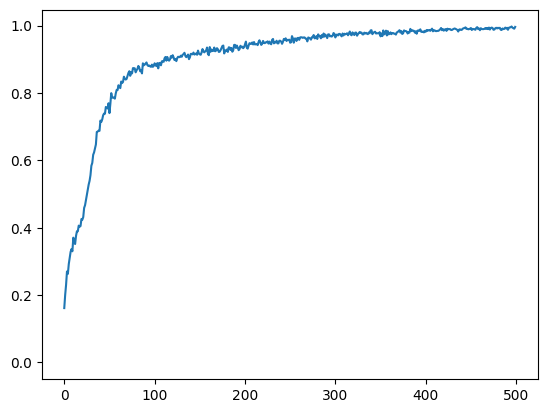

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1482
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1221
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1123
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1095
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1092
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 7/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 8/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1001
Epoch 9/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1017
Epoch 10/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1005
Epoch 11/500
181/181 [==============================] - 1s 5ms/step - loss: 0.0991
Epoch 12/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0971
Epoch 13/500


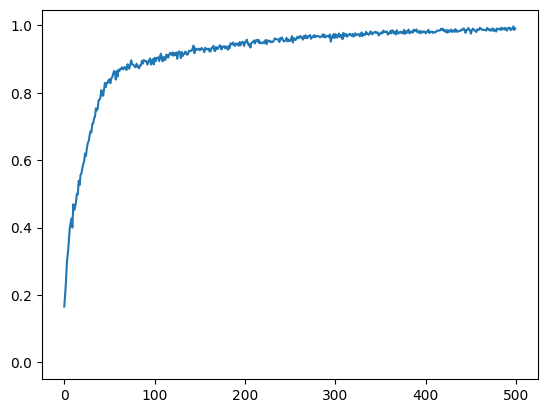

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1501
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1337
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1204
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1163
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1164
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1128
Epoch 7/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1145
Epoch 8/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1097
Epoch 9/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1100
Epoch 10/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1100
Epoch 11/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1081
Epoch 12/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1056
Epoch 13/500


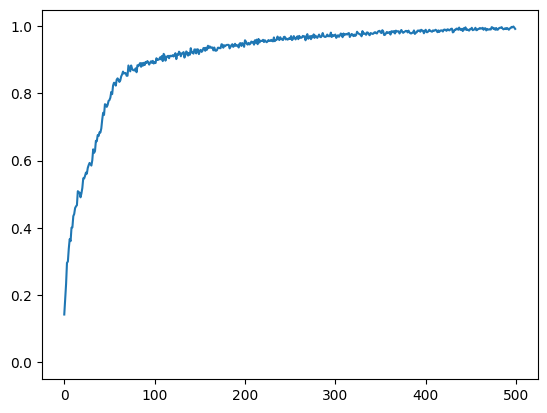

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1416
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1212
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1134
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1122
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1082
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1082
Epoch 7/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1066
Epoch 8/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1014
Epoch 9/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1043
Epoch 10/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1006
Epoch 11/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1010
Epoch 12/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1003
Epoch 13/500


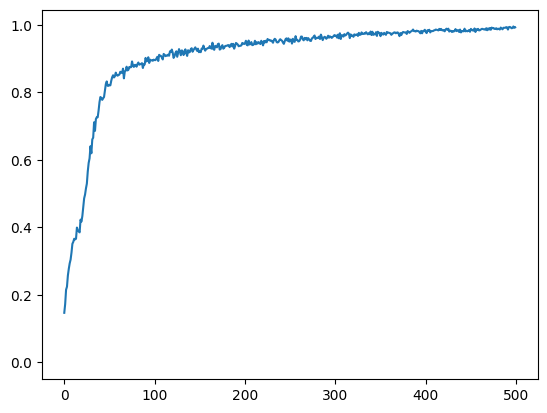

Epoch 1/500
181/181 [==============================] - 1s 4ms/step - loss: 0.1446
Epoch 2/500
181/181 [==============================] - 1s 4ms/step - loss: 0.1272
Epoch 3/500
181/181 [==============================] - 1s 4ms/step - loss: 0.1217
Epoch 4/500
181/181 [==============================] - 1s 4ms/step - loss: 0.1140
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1100
Epoch 6/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1085
Epoch 7/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1021
Epoch 8/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1020
Epoch 9/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1054
Epoch 10/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1031
Epoch 11/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1046
Epoch 12/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1028
Epoch 13/500


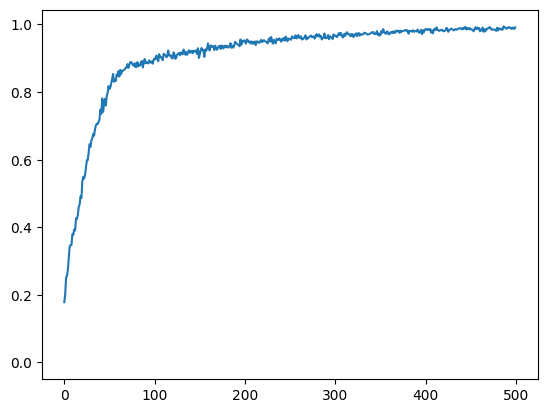

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1469
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1218
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1063
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1029
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1000
Epoch 6/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1003
Epoch 7/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1000
Epoch 8/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0999
Epoch 9/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1001
Epoch 10/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0971
Epoch 11/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0970
Epoch 12/500
181/181 [==============================] - 1s 6ms/step - loss: 0.0981
Epoch 13/500


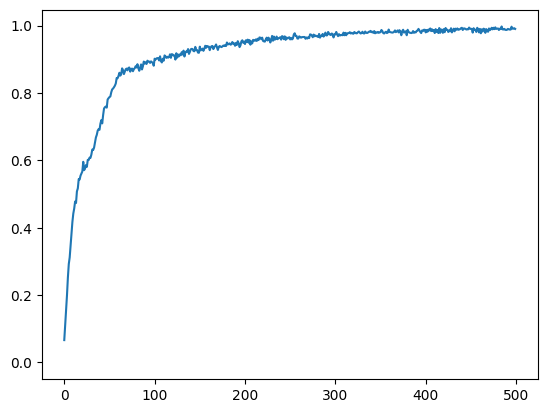

Epoch 1/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1481
Epoch 2/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1275
Epoch 3/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1202
Epoch 4/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1112
Epoch 5/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1113
Epoch 6/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1077
Epoch 7/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1054
Epoch 8/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1067
Epoch 9/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1030
Epoch 10/500
181/181 [==============================] - 1s 6ms/step - loss: 0.1036
Epoch 11/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1019
Epoch 12/500
181/181 [==============================] - 1s 5ms/step - loss: 0.1039
Epoch 13/500


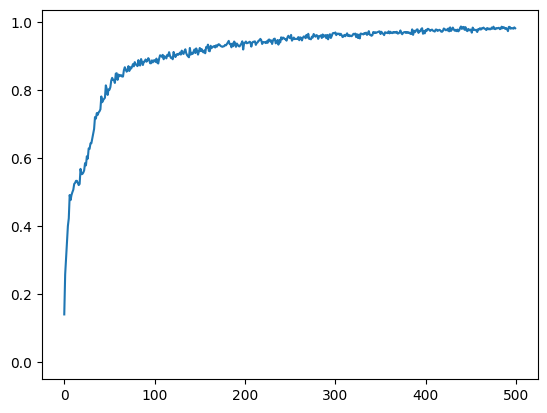

average accuracy : 0.8898119258522262


In [11]:
# 10fold validation 수행여부
bTenFoldValidation = True
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 16, validation_data=(x_val, y_val))
    
    g.trainable=False
    m = deep.final_model(x.shape[1:], g, (1296,))
    
    m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

    # 학습시 사용하는 옵션
    train_options = exp.TrainParams(m, epochs=1000, batch_size_per_class=16)

    # 학습
    result = exp.train_batches_with_random_selection(train_options, x_train, y_train, x_val, y_val)

    # 테스트
    if(x_test.shape[0] > 0):
        test_acc_tmp = np.sum(np.argmax(np.squeeze(result.model.predict(x_val)), -1) == y_val) / y_val.shape[0]
        print(f'test_acc:{test_acc_tmp}')
    # 결과 출력

    plt.plot(result.train_acc)
    plt.plot(result.val_acc)
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    N = 10
    total = 0
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x_norm, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        g = deep.encoder(x.shape[1:])
        
        g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

        # 학습
        hist = g.fit(x_train, y_train, epochs=500, batch_size = 32)
        g.trainable=False
        m = deep.final_model(x.shape[1:], g, g.output_shape[1:])
        
        m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        
        # 학습시 사용하는 옵션
        train_options = exp.TrainParams(m, epochs=500, batch_size_per_class=256)
        
        result = exp.train_batches_with_random_selection(train_options, x_train, y_train, bVerbose=False)
        
        # 테스트
        o = np.argmax(np.squeeze(result.model.predict(x_test)), -1)
        test_acc_tmp = np.sum(o == y_test) / y_test.shape[0]
        #for j in range(y_test.shape[0]):
            #cm[i, int(y_test[j]), int(o[j])] += 1  #Confusion Matrix 계산

        # 결과 출력
        print(f'{i}/{N}\t test_acc:{test_acc_tmp}')
        plt.plot(result.train_acc)
        plt.plot(result.val_acc)
        plt.show()
        total = total + test_acc_tmp

ave = total/10
print(f'average accuracy : {ave}')

In [6]:
p = g.predict(x_test)

21/21 [==============================] - 0s 2ms/step


In [9]:
p[1]

array([1.4024421 , 2.5842478 , 2.3225386 , ..., 0.9791202 , 0.34638548,
       0.02998273], dtype=float32)

In [2]:
# 텍스트 파일에서 Confusion matrix 불러오기
loaded_cm = np.loadtxt('confusion_matrix.txt', dtype=int, delimiter='\t')
print(loaded_cm)

[[1499    2   21    0   11    0    0]
 [   2  679    2    8   10    0    2]
 [  14    1 1225   92    3    0   22]
 [   3    5   99  401   10    0  108]
 [  19   10    1    5  629    0   43]
 [   0    0    0    0    0    0    0]
 [   0    0   35   96   39    0 1338]]


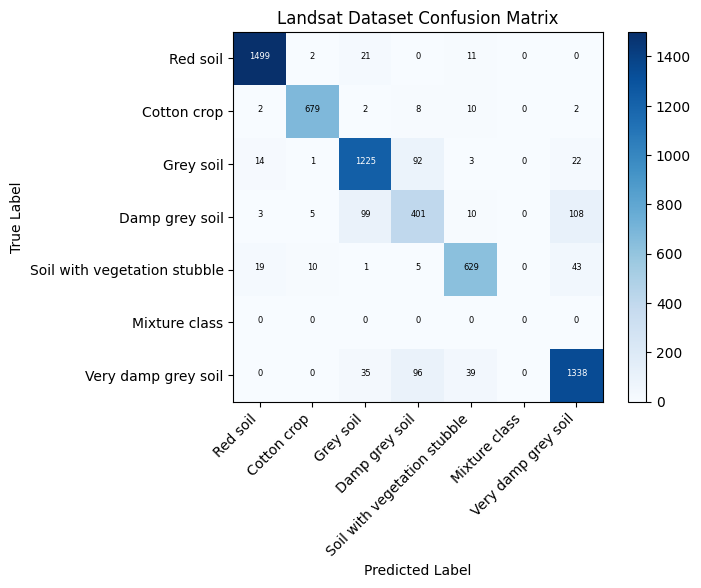

In [3]:
conf_matrix = loaded_cm

# 시각화
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Landsat Dataset Confusion Matrix')
plt.colorbar()

classes = ['Red soil', 'Cotton crop', 'Grey soil', 'Damp grey soil', 'Soil with vegetation stubble', 'Mixture class', 'Very damp grey soil']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 각 셀에 숫자 표시
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(int(conf_matrix[i, j])),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black",
                 fontsize=6)  # 숫자의 글자 크기 조절

plt.show()
